In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Generate synthetic IoT sensor dataset
np.random.seed(42)
n_samples = 500

data = {
    "temperature": np.random.uniform(15, 40, n_samples),  # in °C
    "humidity": np.random.uniform(20, 90, n_samples),     # in %
    "soil_moisture": np.random.uniform(10, 60, n_samples), # in %
}

df = pd.DataFrame(data)

# Define target: irrigation needed if soil_moisture < 30% or temp > 35°C
df["irrigation_needed"] = np.where(
    (df["soil_moisture"] < 30) | (df["temperature"] > 35), 1, 0
)

df.head()


,temperature,humidity,soil_moisture,irrigation_needed
0,24.363503,68.871320,19.256646,1
1,38.767858,57.526746,37.095047,1
2,33.299849,41.666933,53.647292,0
3,29.966462,76.965651,46.611244,0
4,18.900466,67.931182,50.328057,0


In [ ]:
# Split dataset
X = df[["temperature", "humidity", "soil_moisture"]]
y = df["irrigation_needed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        43

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
# Simulated real-time IoT sensor reading
new_sensor_data = np.array([[37, 50, 25]])  # [temp=37°C, humidity=50%, soil_moisture=25%]
prediction = model.predict(new_sensor_data)

print("Prediction (1=Irrigation Needed, 0=No Irrigation):", prediction[0])


Prediction (1=Irrigation Needed, 0=No Irrigation): 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


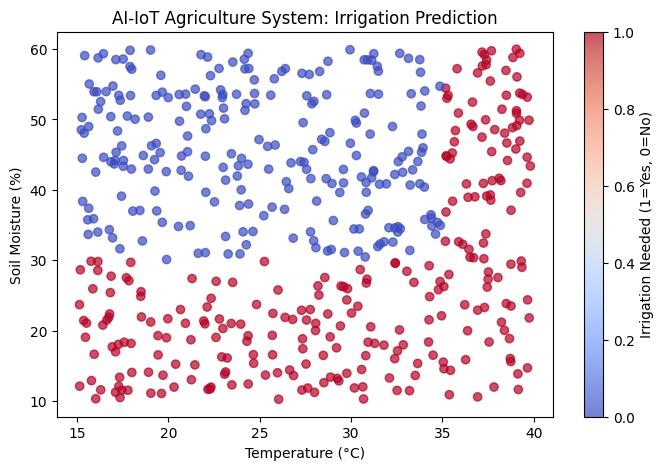

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df["temperature"], df["soil_moisture"], c=df["irrigation_needed"], cmap="coolwarm", alpha=0.7)
plt.colorbar(label="Irrigation Needed (1=Yes, 0=No)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Soil Moisture (%)")
plt.title("AI-IoT Agriculture System: Irrigation Prediction")
plt.show()
